# Python imports

In [16]:
import os
from pprint import pprint
from google import genai
from google.genai import types
from PIL import Image
from io import BytesIO
from dotenv import load_dotenv

# Loading Credentials from `.env`

In [24]:
load_dotenv(dotenv_path=".env", override=True)

API_KEY = os.environ.get("GEMINI_API_KEY", "")

client = genai.Client(api_key=API_KEY)

# Image Path Imports & Prompt Setup

In [18]:
# Base image prompts:
# 1. Dress: "A professionally shot photo of a blue floral summer dress on a plain white background, ghost mannequin style."
blue_dress_image = Image.open("./virtual-try-on/blue-dress.jpg")
model_image = Image.open("./virtual-try-on/female-model.png")

text_input = """Create a professional e-commerce fashion photo. Take the blue dress from the first image and let the woman from the second image wear it. 
                Generate a realistic, full-body shot of the woman wearing the dress. Ensure the woman's face, her pose, and dress design and features remain completely unchanged."""

# Generate Image From Txext And Reference Image

In [19]:
response = client.models.generate_content(
    model="gemini-2.5-flash-image-preview",
    contents=[blue_dress_image, model_image, text_input],
)

image_parts = [
    part.inline_data.data
    for part in response.candidates[0].content.parts
    if part.inline_data
]

# Printing Image generation part

In [ ]:
# print("Resonse:", response)

Resonse: sdk_http_response=HttpResponse(
  headers=<dict len=11>
) candidates=[Candidate(
  content=Content(
    parts=[
      Part(
        inline_data=Blob(
          data=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03\x80\x00\x00\x04\x80\x08\x02\x00\x00\x00!\xf1\xb4\x8e\x00\x00 \x00IDATx\xdad\xfd\xe7w\x14\xd7\xf6<\x0e\xdf7\xcf\xc7\xc6\xd9&g\x94s"\x8b \x94%r\x16\x12\xca\x01\x13\x85\x10\x02\x1bp\xb61\x19\xa1\x9c\xb3\x84\x129\'\xfb~\xff\xb5\xe7\xec\xaa\xbdO...',
          mime_type='image/png'
        )
      ),
    ],
    role='model'
  ),
  finish_reason=<FinishReason.STOP: 'STOP'>,
  index=0
)] create_time=None model_version='gemini-2.5-flash-image-preview' prompt_feedback=None response_id='wmnCaOGmM6LXz7IP5faRkAM' usage_metadata=GenerateContentResponseUsageMetadata(
  candidates_token_count=1290,
  candidates_tokens_details=[
    ModalityTokenCount(
      modality=<MediaModality.IMAGE: 'IMAGE'>,
      token_count=1290
    ),
  ],
  prompt_token_count=2646,
  prompt_tokens_detail

# [For Debug] Printing `image_parts` type

In [21]:
type(image_parts)

list

# Storing Image Locally

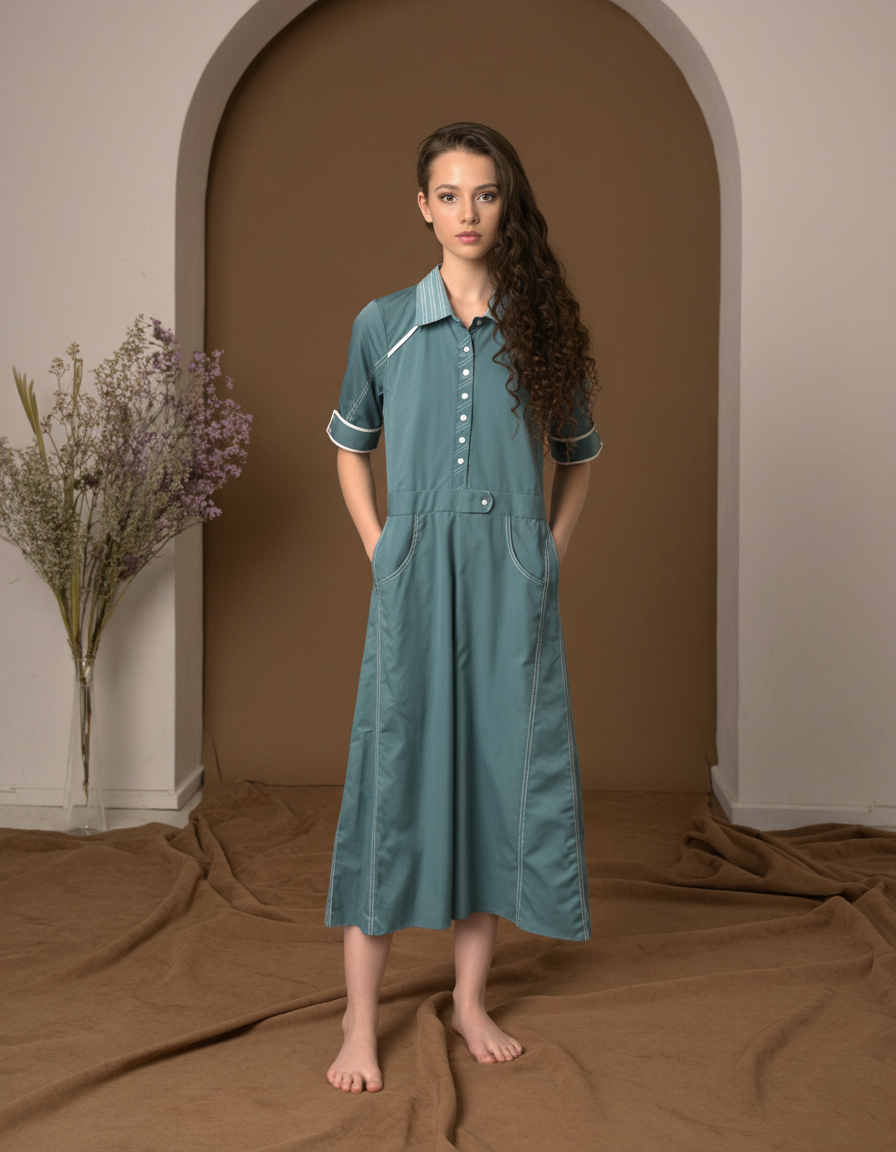

In [22]:
if image_parts:
    image = Image.open(BytesIO(image_parts[0]))
    image.save("./generated-images/fashion_ecommerce_shot_5.png")
    image.show()